# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](img/learning_paradigm.png)

Lets take an example to understand both the learning paradigms - Machine Learning and Deep Learning

We will be starting with a classification exercise. And using the **Fashion Mnist** dataset to do so. It involves identifying the 10 types of products that are there in the image.

- Train: 60,000 images
- Test: 10,000 images
- Class: 10
- Labels: 
 - 0: T-shirt/top
 - 1: Trouser
 - 2: Pullover
 - 3: Dress
 - 4: Coat
 - 5: Sandal
 - 6: Shirt
 - 7: Sneaker
 - 8: Bag
 - 9: Ankle boot

### Get Input and Output

In [1]:
import numpy as np
import keras
import tensorflow as tf

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
label = fashion_mnist_label()
label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### View the Dataset

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

#### See an Image

In [6]:
# Lets plot a single image
def image(index):
    plt.imshow(x_train[index], cmap="gray")
    plt.title(label[y_train[index]])

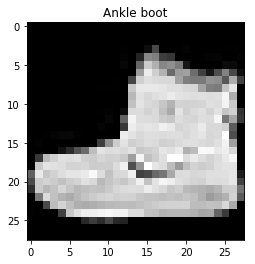

In [7]:
image(0)

### See an Image from each class

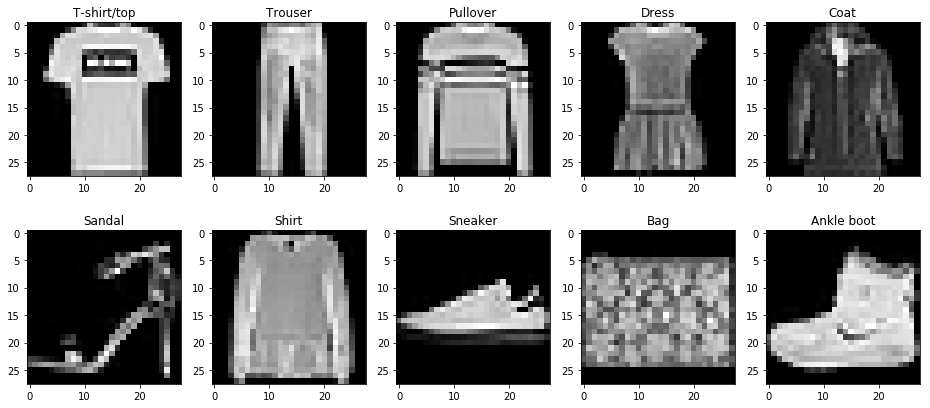

In [8]:
# Lets plot one image from each class
u, indices = np.unique(y_train, return_index=True)
plt.figure(figsize = (16,7))
for i in u:
    plt.subplot(2,5,i+1)
    image(indices[i])

#### See 500 of the Images

In [9]:
from helpers import create_sprite, create_embedding

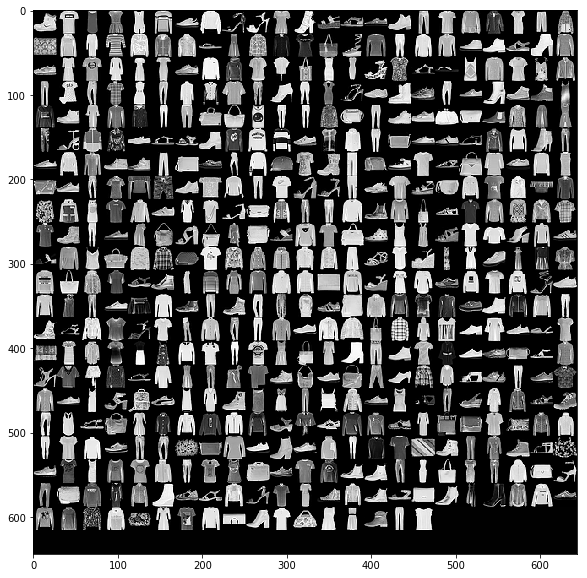

In [10]:
sprite = create_sprite(x_train[:500])
plt.figure(figsize = (10,10))
plt.imshow(sprite,cmap='gray')

In [11]:
x_train[:500].shape

(500, 28, 28)

In [12]:
create_embedding("fashion-mnist", "fashion-mnist-embedding", 500)

Extracting data/fashion-mnist/train-images-idx3-ubyte.gz
Extracting data/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting data/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting data/fashion-mnist/t10k-labels-idx1-ubyte.gz

    Created embedding in the directory -> logs/fashion-mnist-embedding/ 
    Run the following command from the terminal
    
    tensorboard --logdir=logs/fashion-mnist-embedding/


After running the above command in terminal - you should see the tensorboard running

![Fashion-mnist PCA TensorBoard](img/fashion_pca_tensorboard.png)

## ML Approach - 2 Feature Classification

![simple2_ml](img/simple2_ml.png)

**Step 1: Prepare the images and labels**

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [13]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

Flatten the data from (60000, 28, 28) to (60000, 784)

In [14]:
x_train_flatten = x_train.reshape(60000, 28 * 28)
x_test_flatten = x_test.reshape(10000, 28 * 28)

Convert class vectors to binary class matrices

In [15]:
from keras.utils import to_categorical

In [16]:
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

**Step 2: Craft the feature transfomation **

Use PCA to reduce from 784 features to 2 features

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train_flatten)
x_train_feature_2 = pca.transform(x_train_flatten)
x_test_feature_2 = pca.transform(x_test_flatten)

**Step 3: Create a classifier to predict the 10 classes**

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [19]:
model_simple2_ml = Sequential()
model_simple2_ml.add(Dense(10, input_shape=(2,), activation='softmax'))

In [20]:
model_simple2_ml.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [21]:
model_simple2_ml.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
# Callback to save log files for tensorboard
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/simple2-ml')

# Callback to save log files after every batch
from helpers import MetricHistory
history = MetricHistory()

In [23]:
%%time 
model_simple2_ml.fit(x_train_feature_2, y_train_class, batch_size=128, epochs=2,verbose=1,
                    validation_data=(x_test_feature_2, y_test_class),
                    callbacks=[tbCallBack, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 25us/step - loss: 1.8601 - acc: 0.3553 - val_loss: 1.4608 - val_acc: 0.4364
Epoch 2/2
60000/60000 [==============================] - 1s 23us/step - loss: 1.4371 - acc: 0.4434 - val_loss: 1.4197 - val_acc: 0.4485
CPU times: user 3.53 s, sys: 497 ms, total: 4.03 s
Wall time: 3.67 s


**Step 5: Check the performance of the model**

In [24]:
score = model_simple2_ml.evaluate(x_test_feature_2, y_test_class, verbose=0)

In [25]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4197210048675537
Test accuracy: 0.4485


**Step 6: Make & Visualise the Prediction**

In [26]:
model_simple2_ml.predict_proba(x_test_feature_2)[0]

array([0.00058189, 0.0011003 , 0.00359575, 0.00075568, 0.0013377 ,
       0.28313854, 0.00222901, 0.4105471 , 0.07415048, 0.22256345],
      dtype=float32)

In [27]:
from helpers import plot_prediction, plot_2d_model

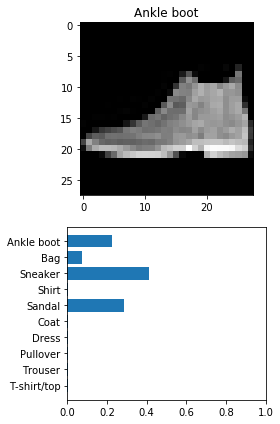

In [28]:
plot_prediction(0, x_test, y_test, x_test_feature_2, model_simple2_ml)

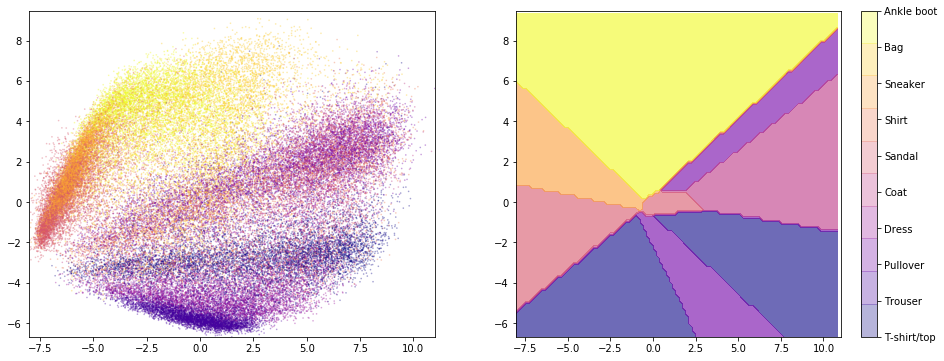

In [29]:
plot_2d_model(model_simple2_ml, x_train_feature_2, y_train)

## ML Approach - 100 Feature Classification

![](img/simple100_ml.png)

**Step 2: Craft the feature transfomation **

Lets take craft 100 features (using PCA) and then classify the result

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100).fit(x_train_flatten)
x_train_feature_100 = pca.transform(x_train_flatten)
x_test_feature_100 = pca.transform(x_test_flatten)

**Step 3: Create a classifier to predict the 10 classes**

In [31]:
model_simple100_ml = Sequential()
model_simple100_ml.add(Dense(10, input_shape=(100,), activation='softmax'))

In [32]:
model_simple100_ml.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [33]:
model_simple100_ml.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [34]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/simple100-ml')

In [35]:
%%time 
model_simple100_ml.fit(x_train_feature_100, y_train_class, batch_size=128, epochs=2, verbose=1,
                    validation_data=(x_test_feature_100, y_test_class),
                    callbacks=[tbCallBack, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 23us/step - loss: 1.2136 - acc: 0.5901 - val_loss: 0.8704 - val_acc: 0.7097
Epoch 2/2
60000/60000 [==============================] - 1s 21us/step - loss: 0.7759 - acc: 0.7419 - val_loss: 0.7387 - val_acc: 0.7488
CPU times: user 3.55 s, sys: 324 ms, total: 3.87 s
Wall time: 3.3 s


**Step 5: Check the performance of the model**

In [36]:
score = model_simple100_ml.evaluate(x_test_feature_100, y_test_class, verbose=0)

In [37]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7386516907215118
Test accuracy: 0.7488


**Step 6: Make & Visualise the Prediction**

In [38]:
model_simple100_ml.predict_proba(x_test_feature_100)[0]

array([0.00173196, 0.00634773, 0.00179584, 0.003067  , 0.00180744,
       0.27237928, 0.00071784, 0.3409233 , 0.05667635, 0.31455332],
      dtype=float32)

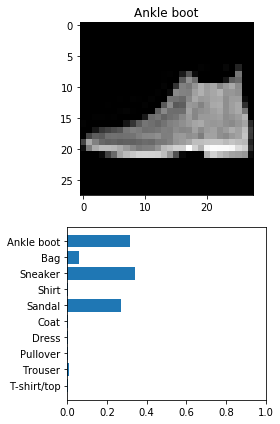

In [39]:
plot_prediction(0, x_test, y_test, x_test_feature_100, model_simple100_ml)

## Deep Learning Approach - Single Layer

![](img/single_dl.png)

Lets learn both the representation and the classifier together now

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [40]:
model_single_dl = Sequential()
model_single_dl.add(Dense(100, input_shape=(784,), activation='linear'))
model_single_dl.add(Dense(10, activation='softmax'))

In [41]:
model_single_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [42]:
model_single_dl.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [43]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/single-dl')

In [44]:
%%time 
model_single_dl.fit(x_train_flatten, y_train_class, batch_size=2, epochs=2, verbose=1,
                    validation_data=(x_test_flatten, y_test_class),
                    callbacks=[tbCallBack, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 90s 1ms/step - loss: 0.5476 - acc: 0.8079 - val_loss: 0.5641 - val_acc: 0.7938
Epoch 2/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.4737 - acc: 0.8342 - val_loss: 0.4999 - val_acc: 0.8258
CPU times: user 3min 17s, sys: 25.7 s, total: 3min 43s
Wall time: 2min 51s


**Step 5: Check the performance of the model**

In [45]:
score = model_single_dl.evaluate(x_test_flatten, y_test_class, verbose=1)

10000/10000 [==============================] - 0s 49us/step


In [46]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4998617809295654
Test accuracy: 0.8258


**Step 6: Make & Visualise the Prediction**

In [47]:
model_single_dl.predict_proba(x_test_flatten)[0]

array([3.3009843e-07, 1.1433623e-07, 1.2062058e-06, 7.3066718e-07,
       7.2938406e-07, 3.4119271e-02, 2.2089334e-06, 1.3181312e-01,
       6.0256425e-04, 8.3345968e-01], dtype=float32)

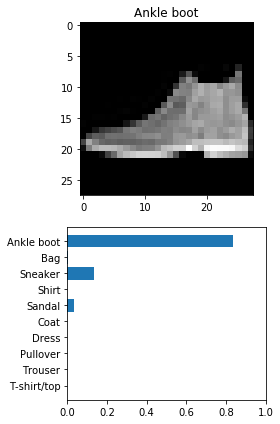

In [48]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_single_dl)

## Deep Learning Approach - Multi Layer Perceptron

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [49]:
model_multi_dl = Sequential()
model_multi_dl.add(Dense(100, input_shape=(784,), activation='sigmoid'))
model_multi_dl.add(Dense(50, activation='sigmoid'))
model_multi_dl.add(Dense(10, activation='softmax'))

In [50]:
model_multi_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [51]:
model_multi_dl.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [52]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/multi-dl')

In [53]:
%%time 
model_multi_dl.fit(x_train_flatten, y_train_class, batch_size=128, epochs=2, verbose=1,
                    validation_data=(x_test_flatten, y_test_class),
                    callbacks=[tbCallBack, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 45us/step - loss: 2.2828 - acc: 0.2783 - val_loss: 2.2013 - val_acc: 0.4502
Epoch 2/2
60000/60000 [==============================] - 2s 32us/step - loss: 2.1327 - acc: 0.4931 - val_loss: 2.0540 - val_acc: 0.4765
CPU times: user 8.34 s, sys: 1.24 s, total: 9.58 s
Wall time: 5.27 s


**Step 5: Check the performance of the model**

In [54]:
score = model_multi_dl.evaluate(x_test_flatten, y_test_class, verbose=1)

10000/10000 [==============================] - 0s 40us/step


In [55]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.0539808681488037
Test accuracy: 0.4765


**Step 6: Make & Visualise the Prediction**

In [56]:
model_multi_dl.predict_proba(x_test_flatten)[0]

array([0.06801187, 0.0777152 , 0.07311272, 0.08016104, 0.08899189,
       0.11615001, 0.08727897, 0.15494612, 0.1110139 , 0.14261827],
      dtype=float32)

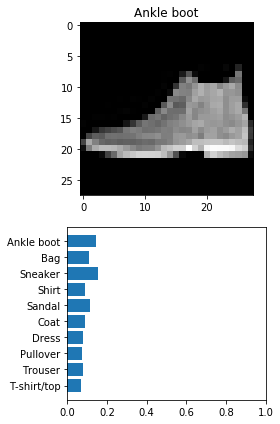

In [57]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_multi_dl)